# One dimensional Elastoplasticity

This example gives the numerical implementation of the one dimensional elastoplasticity model (Houlsby & Puzrin, 2006 - chapter 5.2.1).

![title](Figures/SingleSpringSliderIllustration.pdf)

The Helmholtz free energy $f$ and the yield function $y$ for this model are given by:

\begin{align*}
f = & \frac{E}{2} (\epsilon - \alpha)^2 \\
y = & \left| \chi \right| - k
\end{align*}

The incremental response follows from a standardised approach, which can be written in the following form:

\begin{equation*}
\begin{Bmatrix}
\dot{\sigma} \\
-\dot{\bar{\chi}}
\end{Bmatrix}= 
\begin{bmatrix}
\frac{\partial^2 f}{\partial \epsilon^2} & \frac{\partial^2 f}{\partial \epsilon \partial \alpha} \\
\frac{\partial^2 f}{\partial \epsilon \partial \alpha} & \frac{\partial^2 f}{\partial \alpha^2} \\
\end{bmatrix} 
\begin{Bmatrix}
\dot{\epsilon} \\
\dot{\alpha}
\end{Bmatrix}
\end{equation*}

The rate of hardening strain is defined by:

\begin{equation*}
\dot{\alpha} = \lambda \frac{\partial y}{\partial \chi}
\end{equation*}

where the multiplyer $\lambda$ is derived from the consistency condition:
\begin{equation*}
\dot{y} = 0 = \frac{\partial y}{\partial \sigma} \dot{\sigma} + \frac{\partial y}{\partial \chi} \dot{\chi} + \frac{\partial y}{\partial \alpha} \dot{\alpha} 
\end{equation*}

Combining the above equations for the one dimensional model with Ziegler's orthogonality condition ($\chi=\bar{\chi}$) gives:
\begin{align*}
0 = & \frac{\partial y}{\partial \chi} \left( \frac{\partial^2 f}{\partial \epsilon \partial \alpha} \dot{\epsilon} + \frac{\partial^2 f}{\partial \alpha^2} \lambda \frac{\partial y}{\partial \chi} \right) \\
\lambda = & - \frac{\frac{\partial y}{\partial \chi} \frac{\partial^2 f}{\partial \epsilon \partial \alpha} }{\frac{\partial y}{\partial \chi} \frac{\partial^2 f}{\partial \alpha^2} \frac{\partial y}{\partial \chi}} \dot{\epsilon}
\end{align*}

In [1]:
# The implementation of the above equations is given below
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Model parameters
E = 1
k = 1

# Initialise the model state parameters
sigma = 0
chi = 0
alpha = 0

# Define the applied strain history
epsilon_max_abs = 4
d_epsilon_abs = 0.01
epsilon_history = np.append(np.append(np.arange(0, epsilon_max_abs, 
        d_epsilon_abs), np.arange(epsilon_max_abs, -epsilon_max_abs, 
        -d_epsilon_abs)), np.arange(-epsilon_max_abs, 0, d_epsilon_abs))
sigma_history = np.zeros(len(epsilon_history))

d2_f_d_e2 =  E
d2_f_d_a2 =  E
d2_f_d_ea = -E
d2_f_d_ae = -E

epsilon_0 = 0

# Calculate the incremental response
for index, epsilon in enumerate(epsilon_history):
    
    d_epsilon = epsilon-epsilon_0

    y = np.abs(chi) - k
    d_y_d_chi = np.sign(chi)
    
    if y > 0 and d_epsilon * chi > 0:
        lambda_ = -(d_y_d_chi * d2_f_d_ea)/(d_y_d_chi * d2_f_d_a2 * d_y_d_chi) * d_epsilon
    else:
        lambda_ = 0
        
    d_alpha = lambda_ * d_y_d_chi
    
    d_sigma = d2_f_d_e2 * d_epsilon + d2_f_d_ea * d_alpha
    d_chi = - (d2_f_d_ae * d_epsilon + d2_f_d_a2 * d_alpha)
    
    sigma = sigma + d_sigma
    chi = chi + d_chi
    alpha = alpha + d_alpha
    epsilon_0 = epsilon
    
    sigma_history[index] = sigma

Text(0,0.5,'$\\sigma$')

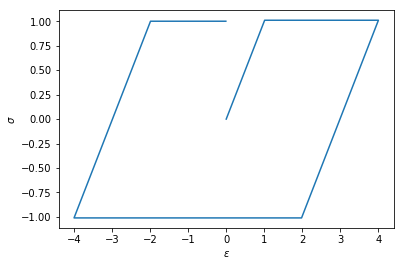

In [2]:
plt.plot(epsilon_history, sigma_history)
plt.xlabel('$\epsilon$')
plt.ylabel('$\sigma$')